# DAVIS SOUTHERN CLUB WOMEN

### Assignment 6

Team: Fireflies

Members: Chunhui Zhu, Yuen Chun Wong, and Chunmei Zhu

Makeup Date: 3/13/2019

### Abstract


Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

### Python Code 

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. ROW LABELS: a woman's name, COLUMN LABELS: # of club. The following is to load data from github link. 

In [25]:
import urllib.request
link='https://raw.githubusercontent.com/czhu505/Data620-Fireflies/master/HW%206/Data'
f = urllib.request.urlopen(link)
myfile = f.read()
print(myfile)

b'DL\nNR=18 NC=14\nFORMAT = FULLMATRIX DIAGONAL PRESENT\nROW LABELS:\nEVELYN\nLAURA\nTHERESA\nBRENDA\nCHARLOTTE\nFRANCES\nELEANOR\nPEARL\nRUTH\nVERNE\nMYRNA\nKATHERINE\nSYLVIA\nNORA\nHELEN\nDOROTHY\nOLIVIA\nFLORA\nCOLUMN LABELS:\nE1\nE2\nE3\nE4\nE5\nE6\nE7\nE8\nE9\nE10\nE11\nE12\nE13\nE14\nDATA:\n 1 1 1 1 1 1 0 1 1 0 0 0 0 0\n 1 1 1 0 1 1 1 1 0 0 0 0 0 0\n 0 1 1 1 1 1 1 1 1 0 0 0 0 0\n 1 0 1 1 1 1 1 1 0 0 0 0 0 0\n 0 0 1 1 1 0 1 0 0 0 0 0 0 0\n 0 0 1 0 1 1 0 1 0 0 0 0 0 0\n 0 0 0 0 1 1 1 1 0 0 0 0 0 0\n 0 0 0 0 0 1 0 1 1 0 0 0 0 0\n 0 0 0 0 1 0 1 1 1 0 0 0 0 0\n 0 0 0 0 0 0 1 1 1 0 0 1 0 0\n 0 0 0 0 0 0 0 1 1 1 0 1 0 0\n 0 0 0 0 0 0 0 1 1 1 0 1 1 1\n 0 0 0 0 0 0 1 1 1 1 0 1 1 1\n 0 0 0 0 0 1 1 0 1 1 1 1 1 1\n 0 0 0 0 0 0 1 1 0 1 1 1 1 1\n 0 0 0 0 0 0 0 1 1 1 0 1 0 0\n 0 0 0 0 0 0 0 0 1 0 1 0 0 0\n 0 0 0 0 0 0 0 0 1 0 1 0 0 0\n'


Bipartite is one of three Network formats. It is always undirected network. Firstly, we used newworkx and import bipartite packages, and used matplotlib to show the network graph. 

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

The following is use nx.graph() graph generator function to collect nodes (vertices) along with (from, to) pairs of nodes. In this data set, we may see 'From' node data is the number representing a woman, and 'To' node data is representing an event for that woman attented. The graph is bipartite (clubs, women). There is an edge for every woman who participates in an event. The first column contains the women, the second column contains the events.

In [4]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


bipartite.projected_graph() shall returns the projection of B onto one of the southern women club node sets. They retain their attributes and are connected in G if they have a common neighbor in B.
The node degree is the number of edges adjacent to that node. In the first pair of the data shows Evelyn Jefferson has 17 edges adjacent to her, which means everyone in each club knows her since there are 18 women in a total. The other members, like Ruth DeSand, Theresa Andersond and etc, are similar polular as Jefferson, having same amount of the connections in this network. 

In [5]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


The weighted_projected_graph() is the projection of the bipartite network B onto the specified woman with weights representing the number of shared friends or the ratio between actual shared friends and possible shared friends if ratio=True. The nodes retain their attributes and are connected in the resulting graph if they have an edge to a common node in the original network. 

In [20]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women, ratio=False)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


From the result, we found an interested result that Theresa Anderson is the most active woman having 50 friend meetings, following is Evelyn Jefferson 50, Brenda Rogers 46, Sylvia Avondale 46, and Laura Mandeville 45. Theresa Anderson and Evelyn Jefferson both have 17 friends, Brenda Rogers has 15 friends, Sylvia Avondale has 17 friends, Laura Mandeville has 15 friends. 

This outcomes seems showing who joins many more meetings, who has more friends in the network, and vice versa. Let's see the less active women's network. 

Flora Price and Olivia Carleton are the least active woman joining 14 friends meetings, also has the smallest number of friends 14. The following is Dorothy Murchison and Charlotte McDowd joining 24 friend's meetings. However, Dorothy Murchison has 16 friends who is surposed joining many friend meetings. 

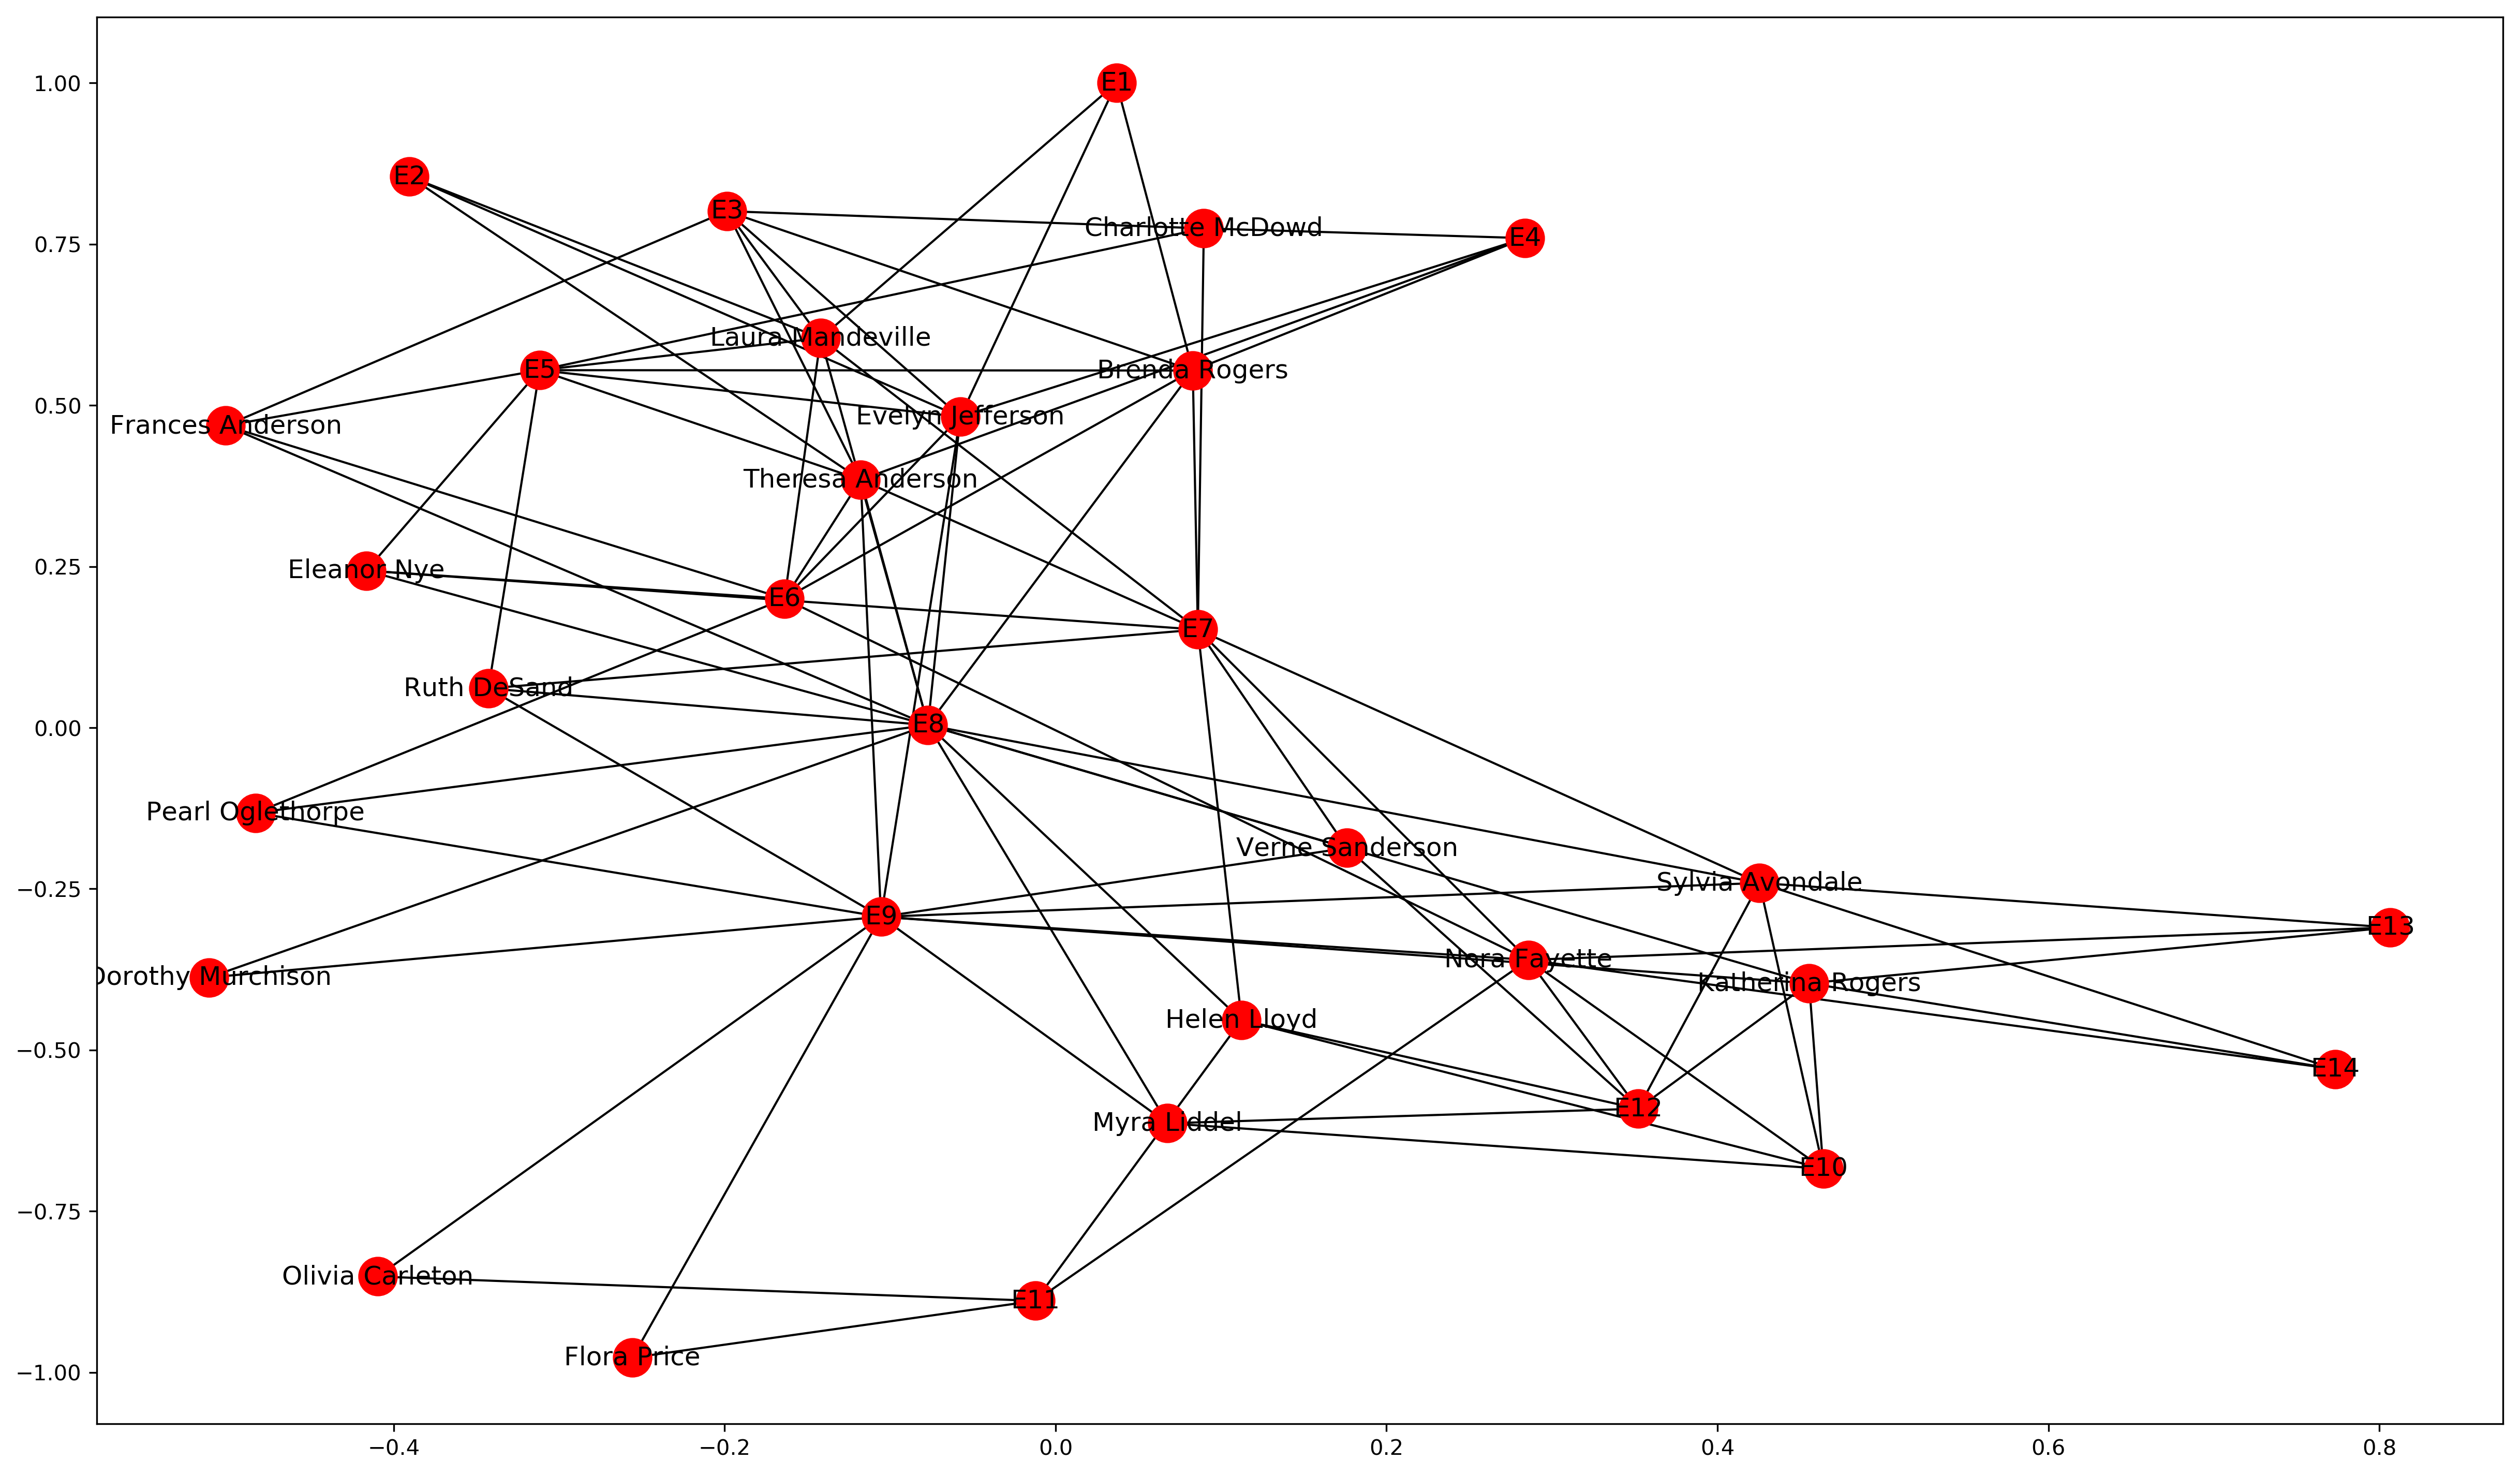

In [41]:
from matplotlib.pyplot import figure
fig=plt.figure(num=None, figsize=(20, 12), dpi=300, facecolor='w', edgecolor='k')
nx.draw_networkx(G)
plt.show()

We observed the degree of connection for each woman.'Evelyn Jefferson','Theresa Anderson', 'Brenda Rogers', and 'Sylvia Avondale' have high degrees. However, Dorothy Murchison only has degree =2. Dorothy Murchison is a unique person who might be at special social statues, that many other womnen know her, yet she doesn't need to be very active in joining friends meeting. 

We also observed 'E9', 'E8','E7' and 'E6'are the most popular events that attracted all kinds of women to join. 

In [31]:
nx.degree(G)

DegreeView({'Evelyn Jefferson': 8, 'Laura Mandeville': 7, 'Theresa Anderson': 8, 'Brenda Rogers': 7, 'Charlotte McDowd': 4, 'Frances Anderson': 4, 'Eleanor Nye': 4, 'Pearl Oglethorpe': 3, 'Ruth DeSand': 4, 'Verne Sanderson': 4, 'Myra Liddel': 4, 'Katherina Rogers': 6, 'Sylvia Avondale': 7, 'Nora Fayette': 8, 'Helen Lloyd': 5, 'Dorothy Murchison': 2, 'Olivia Carleton': 2, 'Flora Price': 2, 'E1': 3, 'E2': 3, 'E3': 6, 'E4': 4, 'E5': 8, 'E6': 8, 'E7': 10, 'E8': 14, 'E9': 12, 'E10': 5, 'E11': 4, 'E12': 6, 'E13': 3, 'E14': 3})

Similarly, 'Evelyn Jefferson','Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette' have the higer degrees also having higher closeness_cntrality.  So do 'E9', 'E8','E7' and 'E6'. 

'Dorothy Murchison' has somewhat lower closeness_cntrality even she has 16 friends, but far from the rest of the network. 

In [32]:
nx.closeness_centrality(G)

{'Evelyn Jefferson': 0.5166666666666667,
 'Laura Mandeville': 0.4696969696969697,
 'Theresa Anderson': 0.5166666666666667,
 'Brenda Rogers': 0.4696969696969697,
 'Charlotte McDowd': 0.3875,
 'Frances Anderson': 0.4305555555555556,
 'Eleanor Nye': 0.4305555555555556,
 'Pearl Oglethorpe': 0.4305555555555556,
 'Ruth DeSand': 0.45588235294117646,
 'Verne Sanderson': 0.45588235294117646,
 'Myra Liddel': 0.44285714285714284,
 'Katherina Rogers': 0.4696969696969697,
 'Sylvia Avondale': 0.5,
 'Nora Fayette': 0.5166666666666667,
 'Helen Lloyd': 0.4696969696969697,
 'Dorothy Murchison': 0.4189189189189189,
 'Olivia Carleton': 0.3780487804878049,
 'Flora Price': 0.3780487804878049,
 'E1': 0.36904761904761907,
 'E2': 0.36904761904761907,
 'E3': 0.3974358974358974,
 'E4': 0.3780487804878049,
 'E5': 0.4189189189189189,
 'E6': 0.484375,
 'E7': 0.5166666666666667,
 'E8': 0.5961538461538461,
 'E9': 0.5535714285714286,
 'E10': 0.3875,
 'E11': 0.3780487804878049,
 'E12': 0.3974358974358974,
 'E13': 0.369